In [4]:
import numpy as np
import itertools
import pandas as pd
import os 

dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:]

integrator_types = ['velocity_verlet'
                    # , 'mclachlan', 
                    # 'omelyan'
                    ]

samplers = [[
    
    # f"adjusted_microcanonical_{integrator_type}", 
    f"unadjusted_microcanonical__{integrator_type}",
    f"underdamped_langevin_{integrator_type}",
    f"adjusted_hmc_{integrator_type}",
    

                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]


# Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
# models = [f"Rosenbrock_{D*2}" for D in Ds]


models = [f"Gaussian_{dim}" for dim in dims]



df_tuned = pd.concat([pd.read_csv(f"results/tuned/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)
# df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df = df_tuned

# df_grid = pd.concat([pd.read_csv(f"results/grid_search/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]
df = df[(df["statistic"] == 'square') | (df['statistic'] == 'x2') ]
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
# df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df['Sampler'] = df['Sampler'].apply({
    'unadjusted_microcanonical__velocity_verlet': 'unadjusted_microcanonical_velocity_verlet',
    'adjusted_microcanonical_velocity_verlet': 'adjusted_microcanonical_velocity_verlet',
    'underdamped_langevin_velocity_verlet': 'underdamped_langevin_velocity_verlet',
    'adjusted_hmc_velocity_verlet': 'adjusted_hmc_velocity_verlet',
}.get)
df['ESS'] = 100/df["num_grads_to_low_error"]
df[df['Integrator']=='velocity_verlet']
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']

df

,Unnamed: 0,Sampler,Model,num_grads_to_low_error,max,statistic,num_tuning_grads,L,step_size,ess_corr,dim,Integrator,ESS
1,1,unadjusted_microcanonical_velocity_verlet,Gaussian_2,310.000000,False,x2,5556.000000,1.417202,0.604452,NaN,2,verlet,0.322581
5,1,unadjusted_microcanonical_velocity_verlet,Gaussian_3,253.000000,False,x2,5556.000000,1.692336,0.868379,NaN,3,verlet,0.395257
9,1,unadjusted_microcanonical_velocity_verlet,Gaussian_4,290.000000,False,x2,5556.000000,1.931508,1.067556,NaN,4,verlet,0.344828
13,1,unadjusted_microcanonical_velocity_verlet,Gaussian_5,257.000000,False,x2,5556.000000,2.148639,1.230847,NaN,5,verlet,0.389105
17,1,unadjusted_microcanonical_velocity_verlet,Gaussian_6,318.000000,False,x2,5556.000000,2.351672,1.381021,NaN,6,verlet,0.314465
21,1,unadjusted_microcanonical_velocity_verlet,Gaussian_7,288.000000,False,x2,5556.000000,2.536434,1.517286,NaN,7,verlet,0.347222
25,1,unadjusted_microcanonical_velocity_verlet,Gaussian_8,293.000000,False,x2,5556.000000,2.710778,1.636043,NaN,8,verlet,0.341297
29,1,unadjusted_microcanonical_velocity_verlet,Gaussian_9,275.000000,False,x2,5556.000000,2.871955,1.740258,NaN,9,verlet,0.363636
33,1,unadjusted_microcanonical_velocity_verlet,Gaussian_100,330.000000,False,x2,5556.000000,9.505955,6.152266,NaN,100,verlet,0.303030
37,1,unadjusted_microcanonical_velocity_verlet,Gaussian_563,321.000000,False,x2,5556.000000,22.423042,15.234066,NaN,563,verlet,0.311526


Text(0.5, 1.0, 'Standard normal with Metropolis adjusted microcanonical sampler')

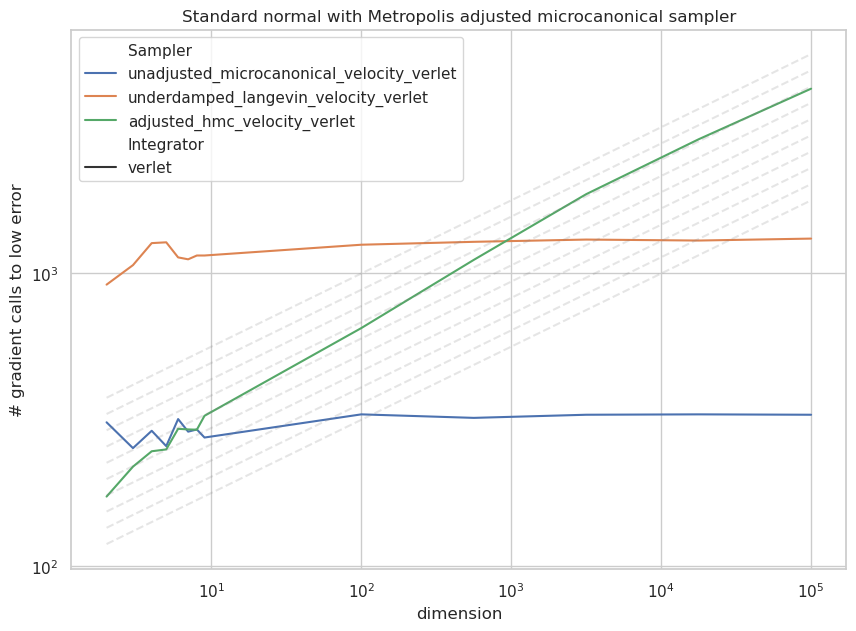

In [5]:
# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))



sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Integrator', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls to low error')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(2,2.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()
plt.title("Standard normal with Metropolis adjusted microcanonical sampler")

In [12]:
# Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:12]
Ds*2

array([   4,    6,    8,   10,   12,   14,   16,   18,  200,  634, 2000,
       6326])

In [13]:
import numpy as np
import itertools
import pandas as pd
import os 

# dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:7]

integrator_types = ['velocity_verlet'
                    # , 'mclachlan', 
                    # 'omelyan'
                    ]

samplers = [[
    
    # f"adjusted_microcanonical_{integrator_type}", 
    f"unadjusted_microcanonical__{integrator_type}",
    f"underdamped_langevin_{integrator_type}",
    f"adjusted_hmc_{integrator_type}",
    

                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]

# grid_samplers = [
#     x
#     for xs in grid_samplers
#     for x in xs
# ]

grid_samplers = [f'grid_search_unadjusted_lmc']

# print(grid_samplers)


Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])
models = [f"Rosenbrock_{D*2}" for D in Ds]

df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df_grid = pd.concat([pd.read_csv(f"results/grid_search/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(grid_samplers, models)], ignore_index=True)

df = pd.concat([df_tuned, df_grid], ignore_index=True)


df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]
df = df[(df["statistic"] == 'square') | (df['statistic'] == 'x2') ]
# df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
# df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df['Sampler'] = df['Sampler'].apply({
    'unadjusted_microcanonical__velocity_verlet':'unadjusted_microcanonical_velocity_verlet',
    'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': 'adjusted_microcanonical_velocity_verlet',
    'underdamped_langevin_velocity_verlet': 'underdamped_langevin_velocity_verlet',
    'adjusted_hmc_velocity_verlet': 'adjusted_hmc_velocity_verlet',
}.get)
df['ESS'] = 100/df["num_grads_to_low_error"]
# df[df['Integrator']=='velocity_verlet']
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']

# df

# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))



sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    # style='Integrator', 
    ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls to low error')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(3.5,4.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()
plt.title("Standard normal with Metropolis adjusted microcanonical sampler")
df

FileNotFoundError: [Errno 2] No such file or directory: 'results/tuned/Rosenbrock/unadjusted_microcanonical__velocity_verlet_Rosenbrock_1126.csv'

In [13]:
import numpy as np
import itertools
import pandas as pd
import os 

Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]


integrator_types = ['velocity_verlet'
                    , 'mclachlan', 
                    'omelyan'
                    ]

samplers = [[
    
    f"adjusted_microcanonical_{integrator_type}", 
    # f"unadjusted_microcanonical__{integrator_type}",
    

                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#     f"grid_search_adjusted_microcanonical_{integrator_type}",
#     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]



models = [f"Rosenbrock_{D*2}" for D in Ds]



df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df = df_tuned

# df_grid = pd.concat([pd.read_csv(f"results/grid_search/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]
df = df[df["statistic"] == 'x2']
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df['ESS'] = 100/df["num_grads_to_low_error"]
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']





Text(0.5, 1.0, 'Product of 2D Rosenbrocks with Metropolis adjusted microcanonical sampler')

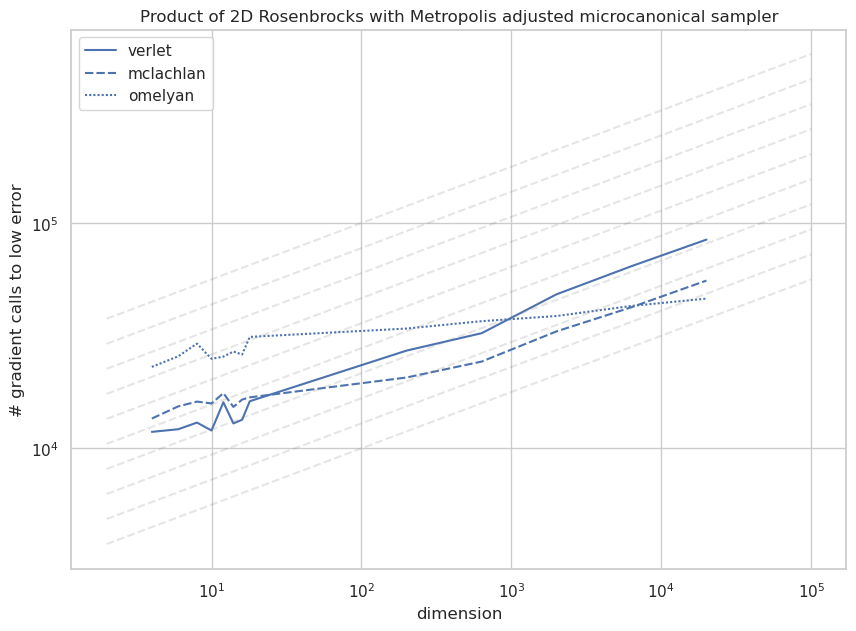

In [21]:
# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    # hue='Sampler', 
    style='Integrator', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls to low error')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(3.5,4.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()
plt.title("Product of 2D Rosenbrocks with Metropolis adjusted microcanonical sampler")